In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [69]:
data = pd.read_csv('StudentsPerformance_modified (7).csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [70]:
data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [71]:
data.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [72]:
# null values
print(data.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64


In [73]:
data.rename(columns={"math score":"Math_Score"},inplace=True)

In [74]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_Score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [75]:
# Convert the 'Math_Score' column to strings before using .str
mathIsDigit = pd.DataFrame(data['Math_Score'].astype(str).str.isdigit())

# Filter the rows where 'Math_Score' is not a digit
data[mathIsDigit['Math_Score'] == False]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_Score,reading score,writing score
17,female,group B,some high school,free/reduced,none,NaN,32.0,28.0
18,male,group C,master's degree,free/reduced,completed,NaN,22.0,46.0
19,female,group C,associate's degree,free/reduced,none,NaN,22.0,61.0
20,male,group D,high school,standard,none,NaN,12.0,63.0
21,female,group B,some college,free/reduced,completed,NaN,12.0,70.0
22,male,group D,some college,standard,none,NaN,13.0,53.0
23,female,group C,some high school,standard,none,NaN,14.0,NaN
34,male,group E,some college,standard,none,NaN,11.0,82.0
432,male,group C,high school,standard,none,?,56.0,55.0
433,female,group A,some high school,free/reduced,none,?,59.0,50.0


In [76]:
# Missing values have a NaN
# Replace the missing values with ?
data = data.replace('?',np.nan)
data[mathIsDigit['Math_Score']==False]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_Score,reading score,writing score
17,female,group B,some high school,free/reduced,none,NaN,32.0,28.0
18,male,group C,master's degree,free/reduced,completed,NaN,22.0,46.0
19,female,group C,associate's degree,free/reduced,none,NaN,22.0,61.0
20,male,group D,high school,standard,none,NaN,12.0,63.0
21,female,group B,some college,free/reduced,completed,NaN,12.0,70.0
22,male,group D,some college,standard,none,NaN,13.0,53.0
23,female,group C,some high school,standard,none,NaN,14.0,NaN
34,male,group E,some college,standard,none,NaN,11.0,82.0
432,male,group C,high school,standard,none,NaN,56.0,55.0
433,female,group A,some high school,free/reduced,none,NaN,59.0,50.0


In [77]:
labelencoder = LabelEncoder()
data_new = data.copy()
data_new['parental level of education'] = labelencoder.fit_transform(data_new['parental level of education'])
data_new['test preparation course'] = labelencoder.fit_transform(data_new['test preparation course'])
data_new['lunch'] = labelencoder.fit_transform(data_new['lunch'])
data_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_Score,reading score,writing score
0,female,group B,1,1,1,72,72.0,74.0
1,female,group C,4,1,0,69,90.0,88.0
2,female,group B,3,1,1,90,95.0,93.0
3,male,group A,0,0,1,47,57.0,44.0
4,male,group C,4,1,1,76,78.0,75.0


In [78]:
data_new.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
Math_Score                     43
reading score                   6
writing score                   9
dtype: int64

In [79]:
import missingno as msno

<AxesSubplot:>

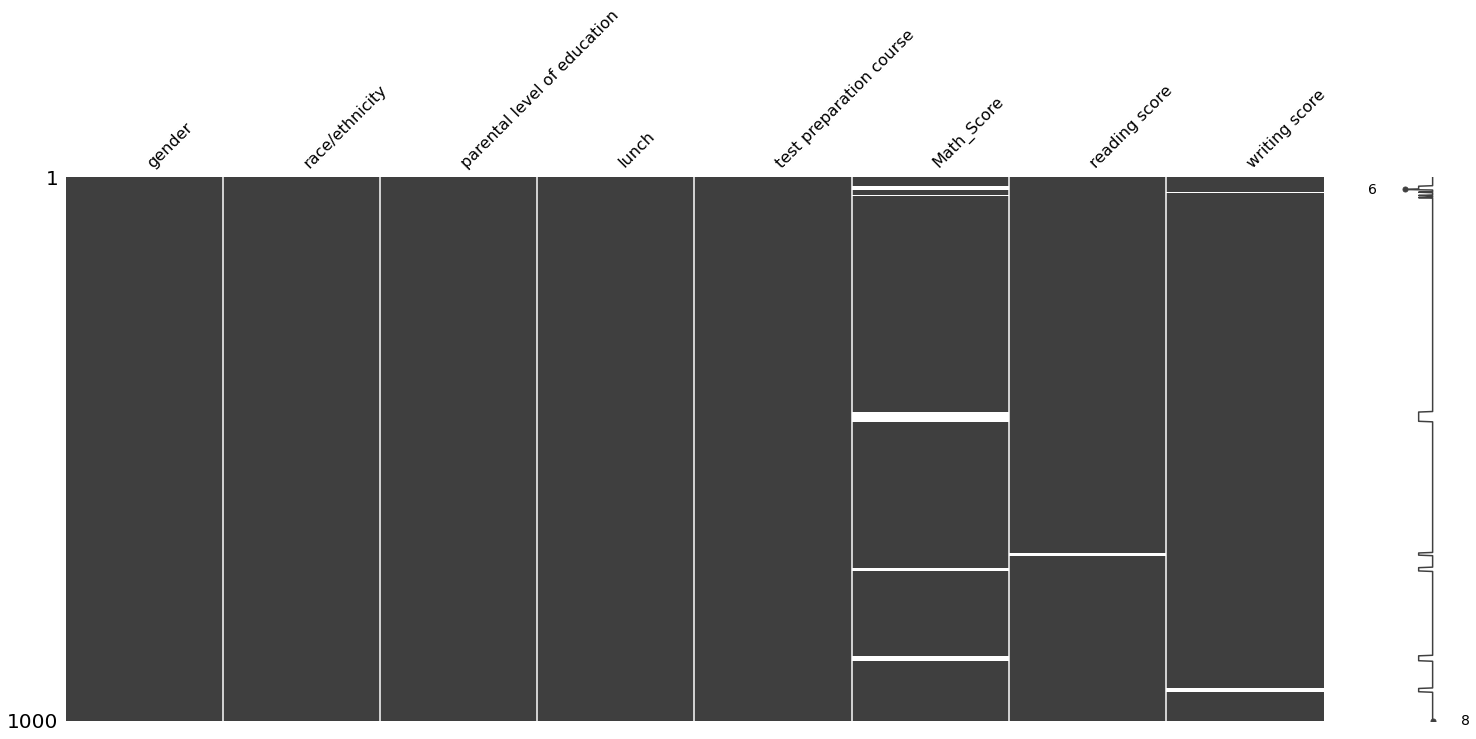

In [80]:
msno.matrix(data_new)

In [81]:
data_new.describe()

,parental level of education,lunch,test preparation course,reading score,writing score
count,1000.000000,1000.000000,1000.000000,994.000000,991.000000
mean,2.486000,0.645000,0.642000,68.008048,69.487386
std,1.829522,0.478753,0.479652,16.602270,29.563757
min,0.000000,0.000000,0.000000,3.000000,10.000000
25%,1.000000,0.000000,0.000000,58.000000,57.000000
50%,2.000000,1.000000,1.000000,69.500000,69.000000
75%,4.000000,1.000000,1.000000,79.000000,79.000000
max,5.000000,1.000000,1.000000,100.000000,567.000000


In [82]:
data_new["Math_Score"].str.isdigit().count()

957

In [83]:
data_new.dtypes

gender                          object
race/ethnicity                  object
parental level of education      int64
lunch                            int64
test preparation course          int64
Math_Score                      object
reading score                  float64
writing score                  float64
dtype: object

In [84]:
numeric_cols = ['test preparation course','Math_Score','reading score','writing score']
medianFiller = lambda x:x.fillna(x.median())
data_new[numeric_cols] = data_new[numeric_cols].apply(medianFiller,axis=0)
data_new['Math_Score'] = data_new['Math_Score'].astype('float64')

In [85]:
data_new.dtypes

gender                          object
race/ethnicity                  object
parental level of education      int64
lunch                            int64
test preparation course          int64
Math_Score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [86]:
data_new.describe()

,parental level of education,lunch,test preparation course,Math_Score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2.486000,0.645000,0.642000,66.310000,68.01700,69.483000
std,1.829522,0.478753,0.479652,17.882497,16.55274,29.430322
min,0.000000,0.000000,0.000000,-89.000000,3.00000,10.000000
25%,1.000000,0.000000,0.000000,57.000000,58.00000,58.000000
50%,2.000000,1.000000,1.000000,66.000000,69.50000,69.000000
75%,4.000000,1.000000,1.000000,76.000000,79.00000,79.000000
max,5.000000,1.000000,1.000000,334.000000,100.00000,567.000000


/home/pict/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

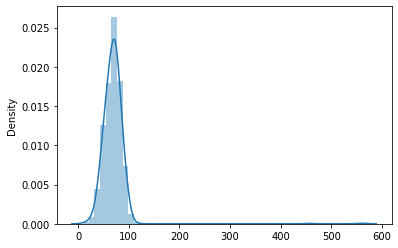

In [87]:
import seaborn as sns
sns.distplot(data_new[["writing score"]])

/home/pict/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

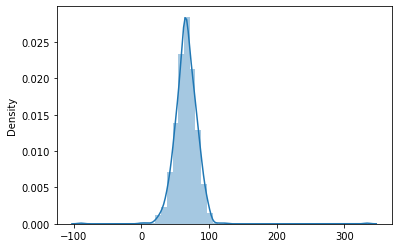

In [88]:
sns.distplot(data_new[["Math_Score"]])

/home/pict/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

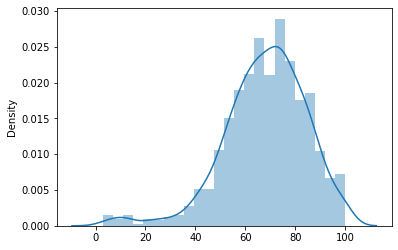

In [89]:
sns.distplot(data_new[["reading score"]])

In [90]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()

train_df[['writing score']] = s.fit_transform(train_df[['writing score']])

NameError: name 'train_df' is not defined

In [91]:
sns.distplot(train_df[['writing score']])

NameError: name 'train_df' is not defined

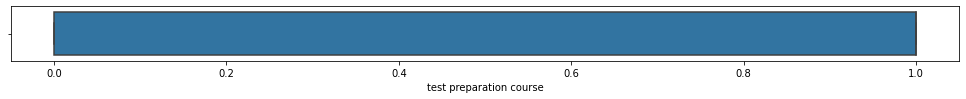

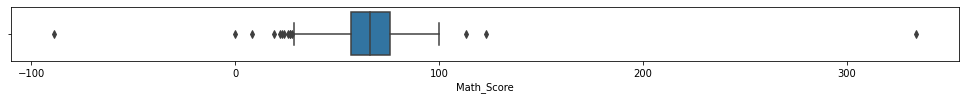

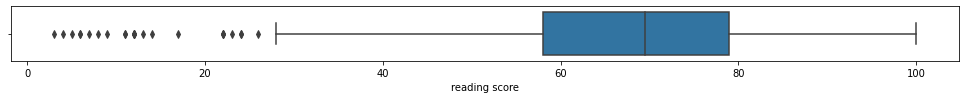

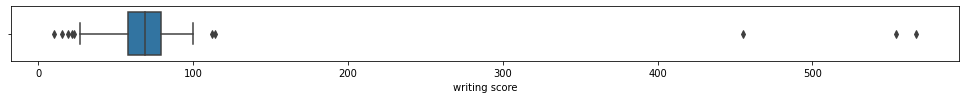

In [92]:
for column in numeric_cols:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=data_new,x=column)

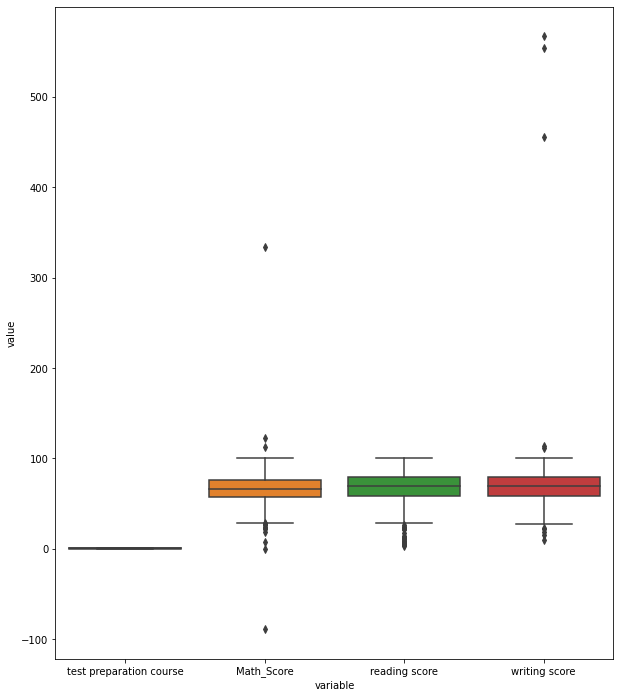

In [93]:
plt.figure(figsize=(10,12))
sns.boxplot(x="variable",y="value",data=pd.melt(data_new[numeric_cols]))
plt.show()

In [94]:
Q1 = data_new.quantile(0.25)
Q3 = data_new.quantile(0.75)
IQR = Q3-Q1
print(IQR)

parental level of education     3.0
lunch                           1.0
test preparation course         1.0
Math_Score                     19.0
reading score                  21.0
writing score                  21.0
dtype: float64


In [95]:
low = Q1 - 1.5 * IQR
high = Q3+1.5*IQR
print(low,high)

parental level of education    -3.5
lunch                          -1.5
test preparation course        -1.5
Math_Score                     28.5
reading score                  26.5
writing score                  26.5
dtype: float64 parental level of education      8.5
lunch                            2.5
test preparation course          2.5
Math_Score                     104.5
reading score                  110.5
writing score                  110.5
dtype: float64


In [96]:
# Zscore to remove outliers

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_new[numeric_cols]))
print(z)
threshold = 3
print(np.where(z>3))

[[0.74674788 0.31834745 0.24074522 0.15355796]
 [1.33914006 0.15050169 1.32872259 0.62949585]
 [0.74674788 1.32542197 1.63093853 0.79947366]
 ...
 [1.33914006 0.40898415 0.18030203 0.15240211]
 [1.33914006 0.09455311 0.60340434 0.25554465]
 [0.74674788 0.59809037 1.08694984 0.56150472]]
(array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  59,  59, 431, 456, 474, 542, 591, 651, 980]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 3,
       3, 3, 1]))


In [97]:
data_new_1 = data_new[(z<3).all(axis=1)]
print(data_new.shape,data_new_1.shape)

(1000, 8) (976, 8)


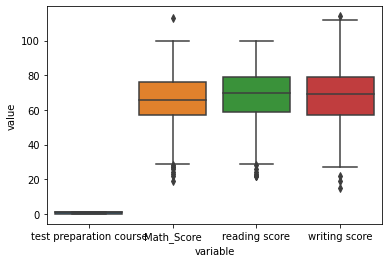

In [98]:
sns.boxplot(x="variable",y="value",data=pd.melt(data_new_1[numeric_cols]))
plt.show()

In [99]:
# Using IQR to remove outliers

#IQR score
# We will use previously calculated IQR scores to filter out the outliers by keeping only the valid values
data_new_2 = data_new[~((data_new < low) | (data_new > high)).any(axis=1)]

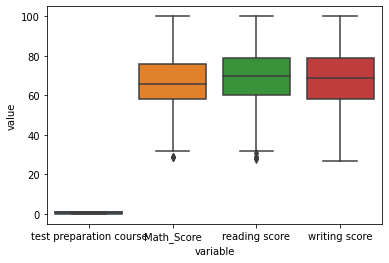

In [100]:
plt.figsize=(8,16)
sns.boxplot(x="variable",y="value",data=pd.melt(data_new_2[numeric_cols]))
plt.show()

In [103]:
# Apply data transformations on atleast one variable
# Using min max feature scaling

data_new.describe()

,parental level of education,lunch,test preparation course,Math_Score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2.486000,0.645000,0.642000,66.310000,68.01700,69.483000
std,1.829522,0.478753,0.479652,17.882497,16.55274,29.430322
min,0.000000,0.000000,0.000000,-89.000000,3.00000,10.000000
25%,1.000000,0.000000,0.000000,57.000000,58.00000,58.000000
50%,2.000000,1.000000,1.000000,66.000000,69.50000,69.000000
75%,4.000000,1.000000,1.000000,76.000000,79.00000,79.000000
max,5.000000,1.000000,1.000000,334.000000,100.00000,567.000000


In [104]:
from sklearn.preprocessing import MinMaxScaler
df_min_max_scaled = data_new.copy()

# apply normalizatiom techniques

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(data_new[numeric_cols].to_numpy())
df_scaled = pd.DataFrame(df_scaled,columns = numeric_cols)

print("Scaled Dataset using MinMaxScaler")
df_scaled.head()

Scaled Dataset using MinMaxScaler


,test preparation course,Math_Score,reading score,writing score
0,1.0,0.380615,0.711340,0.114901
1,0.0,0.373522,0.896907,0.140036
2,1.0,0.423168,0.948454,0.149013
3,1.0,0.321513,0.556701,0.061041
4,1.0,0.390071,0.773196,0.116697


In [106]:
# Standardization

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_std_scaled = std_scaler.fit_transform(data_new[numeric_cols].to_numpy())
df_std_scaled = pd.DataFrame(df_std_scaled,columns = numeric_cols)
print("Scaled Dataset using Standard Scaler")
df_std_scaled.head()

Scaled Dataset using Standard Scaler


,test preparation course,Math_Score,reading score,writing score
0,0.746748,0.318347,0.240745,0.153558
1,-1.339140,0.150502,1.328723,0.629496
2,0.746748,1.325422,1.630939,0.799474
3,0.746748,-1.080367,-0.665903,-0.866309
4,0.746748,0.542142,0.603404,0.187554
